In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial

<h2>Clean Parking Meters Location Data</h2>
<p>Just selected and saved columns for Pole ID, Longitude, and Latitude data</p>

In [ ]:
meters_df = pd.read_csv('raw_parking_meter_location.csv')
meters_loc_df = meters_df[['pole','longitude','latitude']]

#Cleaned traffic meter location data with just latitude and longitude
meters_loc_df.to_csv('clean_parking_meter_location.csv')

In [ ]:
#CLEAN BUSSTOP AND POTHOLE DATA

bus_data = np.load('busDistances.npy')
# bus_data = bus_data[~np.isnan(bus_data).any(axis=0)]

# bus_data = bus_data[~np.isnan(bus_data)]
# bus_data[np.isnan(bus_data)] = 1
print(bus_data.shape)
bus_data

In [ ]:
meter_data = np.load('meterDistances.npy')
meter_data[np.isnan(meter_data)] = 1
min_dist_indices_meter = np.zeros(meter_data.shape[0])
for i in range(0,meter_data.shape[0]):
    min_dist_indices_meter[i] = np.argmin(meter_data[i])

#ASSOCIATE MINIMUM INDICES

min_dist_indices_meter = np.zeros(bus_data.shape[0])
for i in range(0,meter_data.shape[0]):
    min_dist_indices_meter[i] = np.argmin(meter_data[i])

plt.figure(figsize=(10,10))
plt.hist(min_dist_indices_meter, 25)
plt.title('Pothole to nearest Meter Distances')
plt.show(_)

In [114]:
#Recalculate bus distances
open_pot = pd.read_csv('Pr_087/clean_data/cleaned_get_it_done_open_potholes.csv')
open_pot = open_pot[~np.isnan(open_pot['long'])]
open_pot = open_pot[open_pot['long'] != 0]
bus_stops = pd.read_csv('Pr_087/clean_data/clean_bus_stops.csv')
bus_stops = bus_stops[~np.isnan(bus_stops['LONGITUDE'])]
bus_stops = bus_stops[bus_stops['LONGITUDE'] != 0]

In [115]:
open_pot_coordinates = np.asarray(open_pot[['lat','long']])
bus_stops_coordinates = np.asarray(bus_stops[['LATITUDE','LONGITUDE']])


In [116]:
dist_bus_data = scipy.spatial.distance.cdist(open_pot_coordinates,bus_stops_coordinates)
min_dist_indices = np.zeros(dist_bus_data.shape[0])
min_dists = np.zeros(dist_bus_data.shape[0])

for i in range(0,dist_bus_data.shape[0]):
    _ = np.argmin(dist_bus_data[i])
    min_dists[i] = dist_bus_data[i][_]
    min_dist_indices[i] = _    
    if dist_bus_data[i][_] > 20:
        print('WTF',i,':',dist_bus_data[i][_])

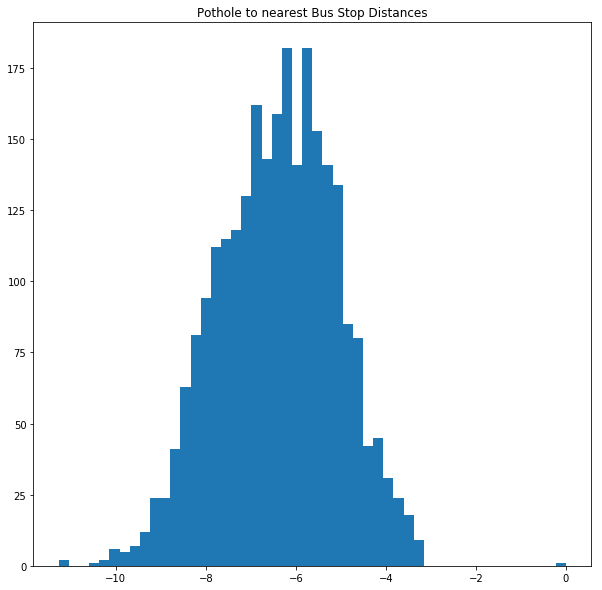

Mean: 0.00395094323259


In [118]:
plt.close()
plt.figure(figsize=(10,10))
plt.hist(np.log(min_dists), 50)
plt.title('Pothole to nearest Bus Stop Distances')
plt.show()
plt.close()
print('Mean:',np.mean(min_dists))

0.262554713182


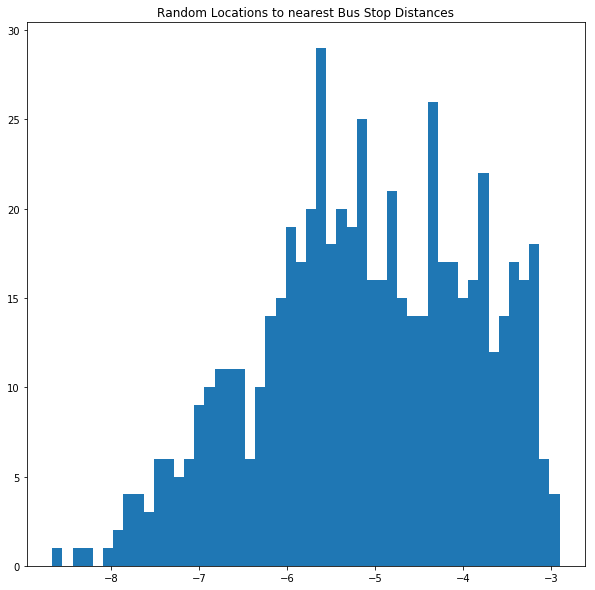

Mean: 0.0112816953121


In [141]:
plt.close()
plt.close()
random_points = pd.read_csv('Pr_087/clean_data/randomPoints.csv')
random_points_coordinates = np.asarray(random_points[['Y','X']])
dist_bus_data = scipy.spatial.distance.cdist(random_points_coordinates,bus_stops_coordinates)
print(np.mean(dist_bus_data))
min_dist_indices = np.zeros(bus_data.shape[0])
min_dists = np.zeros(dist_bus_data.shape[0])
for i in range(0,bus_data.shape[0]):
    _ = np.argmin(dist_bus_data[i])
    min_dists[i] = dist_bus_data[i][_]
    min_dist_indices[i] = _    
plt.figure(figsize=(10,10))
plt.hist(np.log(min_dists), 50)
plt.title('Random Locations to nearest Bus Stop Distances')
plt.show()
plt.close()
print('Mean:',np.mean(min_dists))

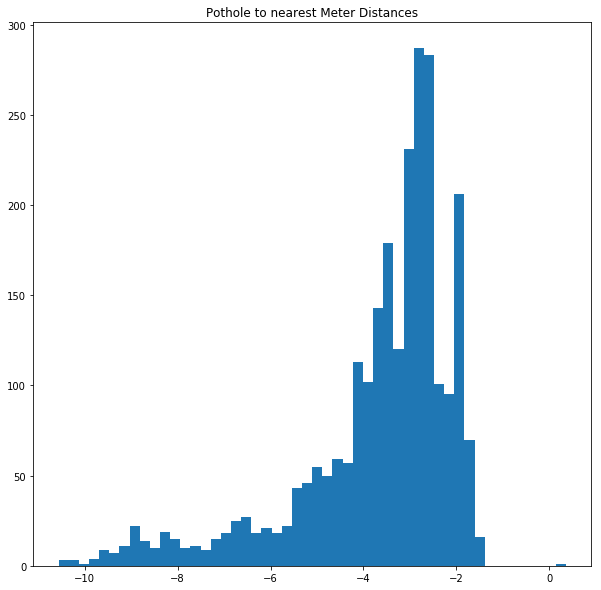

Mean: 0.0538169837883


In [130]:
#Recalculate meter distances
open_pot = pd.read_csv('Pr_087/clean_data/cleaned_get_it_done_open_potholes.csv')
open_pot = open_pot[~np.isnan(open_pot['long'])]
open_pot = open_pot[open_pot['long'] != 0]
meter_data = pd.read_csv('Pr_087/raw_data/raw_parking_meter_location.csv')
meter_data = meter_data[~np.isnan(meter_data['longitude'])]
meter_data = meter_data[meter_data['longitude'] != 0]
open_pot_coordinates = np.asarray(open_pot[['lat','long']])
meter_data_coordinates = np.asarray(meter_data[['latitude','longitude']])

dist_meter_data = scipy.spatial.distance.cdist(open_pot_coordinates,meter_data_coordinates)
min_dist_indices = np.zeros(dist_meter_data.shape[0])
min_dists = np.zeros(dist_meter_data.shape[0])
for i in range(0,dist_meter_data.shape[0]):
    _ = np.argmin(dist_meter_data[i])
    min_dists[i] = dist_meter_data[i][_]
    min_dist_indices[i] = _    
    if dist_meter_data[i][_] > 20:
        print('WTF',i,':',dist_meter_data[i][_])
plt.close()
plt.figure(figsize=(10,10))
plt.hist(np.log(min_dists), 50)
plt.title('Pothole to nearest Meter Distances')
plt.show()
plt.close()
print('Mean:',np.mean(min_dists))

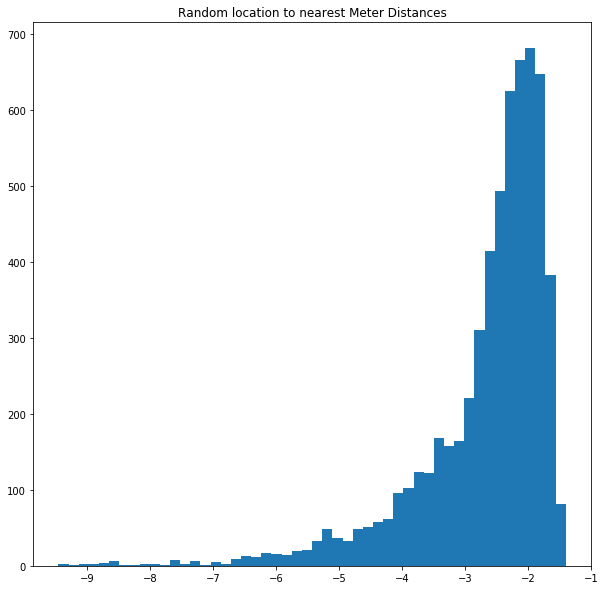

Mean: 0.0955210070438


In [143]:
#Recalculate Random meter distances
random_points = pd.read_csv('Pr_087/clean_data/randPoints6000.csv')
random_points_coordinates = np.asarray(random_points[['Y','X']])

dist_meter_data = scipy.spatial.distance.cdist(random_points_coordinates,meter_data_coordinates)
min_dist_indices = np.zeros(dist_meter_data.shape[0])
min_dists = np.zeros(dist_meter_data.shape[0])
for i in range(0,dist_meter_data.shape[0]):
    _ = np.argmin(dist_meter_data[i])
    min_dists[i] = dist_meter_data[i][_]
    min_dist_indices[i] = _    
    if dist_meter_data[i][_] > 20:
        print('WTF',i,':',dist_meter_data[i][_])
plt.close()
plt.figure(figsize=(10,10))
plt.hist(np.log(min_dists), 50)
plt.title('Random location to nearest Meter Distances')
plt.show()
plt.close()
print('Mean:',np.mean(min_dists))